# Prediciting the sale proce of bulldozers using machinelearning

* Description

* The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.

    * Fast Iron is creating a "blue book for bull dozers," for customers to value what their heavy equipment fleet is worth at auction.
    
## Evaluation

* The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [88]:
# Import training and validation sets
df = pd.read_csv("C:/Users/HP/demos/Bulldozer_price_prediction/data/TrainAndValid.csv",low_memory = False)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [90]:
df.shape

(412698, 53)

In [91]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

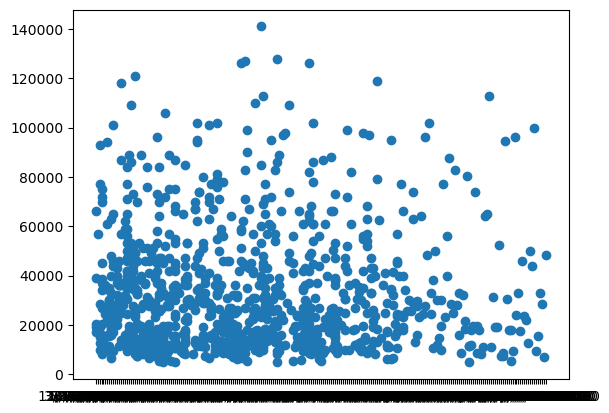

In [92]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][0:1000],df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

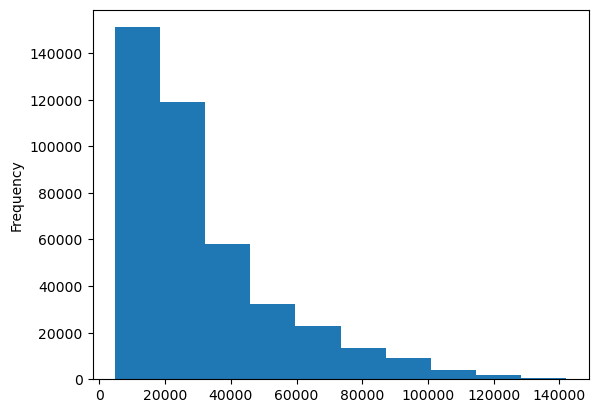

In [93]:
df.SalePrice.plot.hist()

In [94]:
df['saledate'][0:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

### Parsing date


In [95]:
# import data again but this time parsed date
df = pd.read_csv("C:/Users/HP/demos/Bulldozer_price_prediction/data/TrainAndValid.csv",
                 low_memory = False,
                 parse_dates=['saledate'])

In [96]:
df.saledate.dtype

dtype('<M8[ns]')

In [97]:
df.saledate[0:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

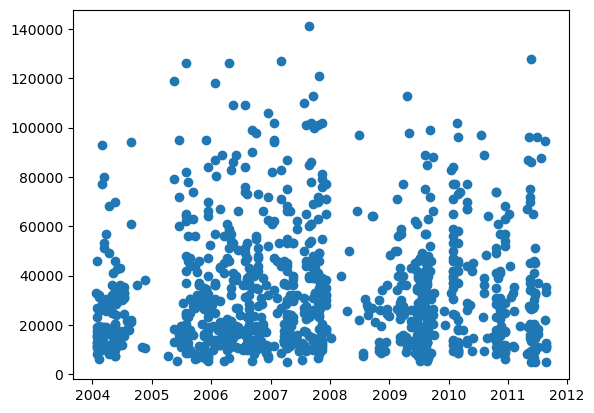

In [98]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][0:1000],df["SalePrice"][:1000])

In [99]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


# Sort dataframe by date
* When workig with timeseries function ,its a good idea to sort it by date

In [101]:
df.sort_values(by = ['saledate'],inplace = True,ascending = True)

In [102]:
df.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Make a copy or oroginal dataframe
* when we manipulate the copy we still have a original data


In [103]:
df_tmp = df.copy()

In [104]:
#  Add Datetime parameter to saledate column
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek

In [105]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


# Now we enriched our dataframe with datetime features,we can remove saledate

In [106]:
df_tmp.drop('saledate',axis = 1,inplace = True)

# Lets do some Model driven EDA!!

## Converting string to categories
One way we can turn all of our data into numbers is to converting thrm inot categories

In [107]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [108]:
# Find the columns which contains string
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [109]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = df_tmp[label].astype('category').cat.as_ordered()

In [110]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [111]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [112]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Now we have a way to access all the data to numbers but we still have a bynch of missing data.


In [113]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

# Save Pre processed data

In [114]:
#  Export current tmp dataframe
df_tmp.to_csv('C:/Users/HP/demos/Bulldozer_price_prediction/data/train_temp.csv',index = False)

In [115]:
df_tmp = pd.read_csv('C:/Users/HP/demos/Bulldozer_price_prediction/data/train_temp.csv',low_memory =False)

In [116]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [117]:
# Fill numeric missing values first
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfYear
saleDayOfWeek


In [118]:
#check for which numeric columns has null valuse
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [119]:
# fill numeric rows with median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binaary columnwhich tells us if data is missing or not
            df_tmp[label +"_is_missing"] = pd.isnull(content)
            #fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [120]:
#check for which numeric columns has null valuse
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [121]:
#  Check to see what binary column did
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [122]:
### Filling and turning categorical variables into numbers
# Fill numeric missing values first
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [123]:
## Turn categorical varaibles into numbers and fill missing
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add a binary column to indaicate whether sample had mssing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        #Turn catrgories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [124]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [125]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [126]:
### Splitting data into train and test date
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [127]:
df_val = df_tmp[df_tmp['saleYear' ]==2012]
df_train = df_tmp[df_tmp['saleYear' ]!=2012]

In [128]:
len(df_val),len(df_train)

(11573, 401125)

In [129]:
#Split data into X and y
X_train,y_train = df_train.drop('SalePrice',axis = 1),df_train['SalePrice']
X_val,y_val = df_val.drop('SalePrice',axis = 1),df_val['SalePrice']

In [130]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((401125, 102), (11573, 102), (401125,), (11573,))

# Create an evaluation fntion (root mean square log error)

In [131]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error between prediction and true value
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
    
    
#Create function to evaluate model on a few different level
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = { "Training MAE" : mean_absolute_error(y_train,train_preds),
              "Valid MAE":mean_absolute_error(y_val,val_preds),
              "Training RMSLE":rmsle(y_train,train_preds),
              "Valid RMSLE":rmsle(y_val,val_preds),
              "Training R2":r2_score(y_train,train_preds),
              "Valid R2":r2_score(y_val,val_preds)
        
    }
    
    return scores



# Testing our model on subset (to tune hyperparameters)

In [84]:
%%time
model  = RandomForestRegressor(n_jobs = -1,random_state  =42)
model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

Wall time: 8min 33s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [138]:

%%time
# Change Max saples
model  = RandomForestRegressor(n_jobs = -1,random_state  =42,max_samples=10000)
model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

Wall time: 22.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [140]:
%%time
### Tuning hyperparameters with randomised search CV

from sklearn.model_selection import RandomizedSearchCV

#Different random forest regressor hyperparameters
rf_grid = {"n_estimators":np.arange(10,100,10),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
          "max_features" : [0.5,1,"sqrt","auto"],
          "max_samples" : [10000]}

# Instantiate randomized search CV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,random_state = 41),
                             param_distributions = rf_grid,
                             n_iter = 5,
                             cv =5,
                             verbose = True)

# fit radmomised search cv odel
rs_model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 2min 54s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=41),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [142]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 5}

In [143]:
show_scores(rs_model)

{'Training MAE': 9852.38161012543,
 'Valid MAE': 11321.401192046516,
 'Training RMSLE': 0.42251476101906377,
 'Valid RMSLE': 0.44072588067851254,
 'Training R2': 0.6185932563708456,
 'Valid R2': 0.6275462206418917}

### Train a model with best hyper parameters 

** Note :these found after 100 iteration of randimised search CV

In [147]:
# Most ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators= 40,
                                 min_samples_split= 14,
                                 min_samples_leaf = 1,
                                 max_samples = None,
                                 max_features = 0.5,
                                 n_jobs = -1,
                                   random_state =42)

ideal_model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [148]:
show_scores(ideal_model)

{'Training MAE': 2951.890756700501,
 'Valid MAE': 5969.165323345881,
 'Training RMSLE': 0.14462583722939487,
 'Valid RMSLE': 0.24663841252433094,
 'Training R2': 0.9588959217158949,
 'Valid R2': 0.8817109349545978}

# Make Prediction in test data


In [178]:
df_test = pd.read_csv("C:/Users/HP/demos/Bulldozer_price_prediction/data/test.csv",low_memory = False,
                     parse_dates = ['saledate'])

In [163]:
ideal_model.predict(df_test)

C:\ProgramData\Anaconda3\demos\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Low'

In [172]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [177]:
### Preproceesing the test data

def preprocess_data(df):
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfYear']= df.saledate.dt.dayofyear
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    
    df.drop("saledate",axis = 1 ,inplace = True)
    
    #fill the numeric rows with median
    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Add a binaary columnwhich tells us if data is missing or not
                df[label +"_is_missing"] = pd.isnull(content)
                #fill missing numeric values with median
                df[label] = content.fillna(content.median())
            
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            #Add a binary column to indaicate whether sample had mssing value
            df[label+"_is_missing"] = pd.isnull(content)
            #Turn catrgories into numbers and add +1
            df[label] = pd.Categorical(content).codes+1


    
    
    return df

In [174]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [179]:
df_test = preprocess_data(df_test)

In [180]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [181]:
ideal_model.predict(df_test)

C:\ProgramData\Anaconda3\demos\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [182]:
# we can find how the columns differ usinf =g sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [185]:
#manualy adjust df_test for auctioneer id is missing
df_test['auctioneerID_is_missing']  = False

In [186]:
df_test['auctioneerID_is_missing'] 

0        False
1        False
2        False
3        False
4        False
         ...  
12452    False
12453    False
12454    False
12455    False
12456    False
Name: auctioneerID_is_missing, Length: 12457, dtype: bool

In [188]:
# Make predicttion on test data
test_preds  = ideal_model.predict(df_test)

C:\ProgramData\Anaconda3\demos\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [189]:
test_preds

array([25218.19454456, 19497.49501819, 51809.08477976, ...,
       16594.10045893, 18135.05609705, 30465.12580008])

In [190]:
#format prediction in same format into kaggle is after

df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,25218.194545
1,1227844,19497.495018
2,1227847,51809.084780
3,1227848,60910.944031
4,1227863,49958.852465
...,...,...
12452,6643171,51718.111406
12453,6643173,14247.141984
12454,6643184,16594.100459
12455,6643186,18135.056097


In [193]:
# Export prediction data
df_preds.to_csv("C:/Users/HP/demos/Bulldozer_price_prediction/data/test_predictions.csv",index = False)

### Feature importance
Feature imporatnce seeks to figure out which different attributes of data when it comes to pedicting the target variable (Saleprice)


In [195]:
# Find feature imporatance of our best model
ideal_model.feature_importances_

array([3.40118086e-02, 1.78445053e-02, 4.13741837e-02, 2.00722379e-03,
       3.35133563e-03, 2.09606754e-01, 3.20537432e-03, 1.07716828e-03,
       4.12695641e-02, 5.13611702e-02, 5.95901259e-02, 4.52661351e-03,
       1.68313943e-02, 1.60962162e-01, 4.60593447e-02, 5.88666385e-03,
       2.33928710e-03, 2.85857266e-03, 3.68865682e-03, 5.14996011e-02,
       7.42341162e-04, 7.74232475e-05, 1.34800290e-03, 1.73095211e-04,
       1.06545608e-03, 2.45475504e-05, 2.03184947e-03, 4.56346248e-03,
       2.60535365e-04, 2.22528348e-03, 4.45748952e-03, 1.32649090e-03,
       3.49813517e-03, 1.23719917e-03, 2.74525292e-04, 7.12009135e-03,
       7.91756939e-04, 1.47410152e-02, 1.68726540e-03, 1.49964100e-03,
       5.90586639e-04, 8.59783678e-04, 1.61386844e-03, 6.16918635e-04,
       8.08519624e-04, 3.58455014e-04, 2.92088600e-04, 2.62663936e-03,
       9.68963989e-04, 2.05437530e-04, 3.29199569e-04, 7.36797004e-02,
       3.76309243e-03, 5.68023884e-03, 9.82142412e-03, 2.93126783e-03,
      

In [196]:
len(ideal_model.feature_importances_)

102

In [231]:
# helper function to see feature importance visaully

def plot_features(columns,importances,n = 20):
    df = pd.DataFrame({"features":columns,"feature_importances":importances}).sort_values("feature_importances",ascending = False)

        
    
    #plt graph
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
 



    

    
    
    

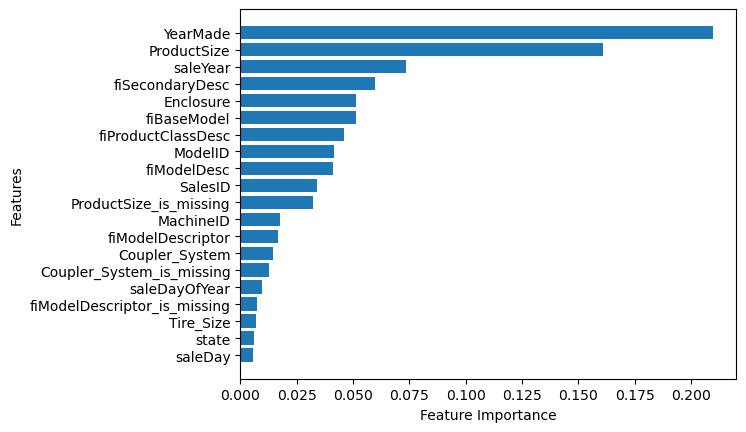

In [232]:
plot_features(X_train.columns,ideal_model.feature_importances_)